# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [1]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [3]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [5]:
movies.movie_title.nunique()

16106

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [21]:
# Check if the date is actually a date 
movies.dtypes

movie_title                   object
rating                        object
genre                         object
in_theaters_date      datetime64[ns]
runtime_in_minutes           float64
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
audience_count               float64
dtype: object

In [47]:
# in_theaters_date Not a date, so need to convert before filtering 

movies.in_theaters_date = pd.to_datetime(movies.in_theaters_date)

# Extract year
movies['year_in_theaters'] = pd.DatetimeIndex(movies['in_theaters_date']).year

# Filter
movies = movies.loc[movies.year_in_theaters >= 2010]

# Result
movies.movie_title.nunique()

5999

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [56]:
movies.sort_values(['tomatometer_rating', 'audience_rating'], ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year_in_theaters
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0,2018
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0,2012
15001,The Uncondemned,NR,Documentary,2016-10-21,81.0,100,13,100.0,124.0,2016
9424,Maktub,NR,"Art House & International, Comedy, Drama",2018-06-15,100.0,100,5,99.0,396.0,2018
1960,5B,PG-13,Documentary,2019-06-14,93.0,100,17,97.0,35.0,2019
...,...,...,...,...,...,...,...,...,...,...
7010,Hallowed Ground,NR,Horror,2019-06-07,117.0,0,6,NaN,NaN,2019
9636,Maximum Impact,NR,"Action & Adventure, Comedy",2018-09-28,110.0,0,10,NaN,NaN,2018
11300,Portals,NR,Horror,2019-10-25,80.0,0,10,NaN,NaN,2019
13867,The Child Remains,NR,Horror,2019-06-07,112.0,0,6,NaN,NaN,2019


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [69]:
movies = movies.loc[movies.audience_count >= 100000]

# Result
movies.movie_title.nunique()

316

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [71]:
movies.sort_values(['tomatometer_rating', 'audience_rating'], ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year_in_theaters
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0,2010
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0,2015
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0,2010
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0,2016
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0,2015
...,...,...,...,...,...,...,...,...,...,...
5945,Fantastic Four,PG-13,Action & Adventure,2015-08-07,100.0,9,252,18.0,137562.0,2015
6942,Grown Ups 2,PG-13,Comedy,2013-07-12,101.0,7,112,53.0,180859.0,2013
3387,"Big Mommas: Like Father, Like Son",PG-13,Comedy,2011-02-18,107.0,5,60,58.0,132093.0,2011
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0,2010


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [95]:
movies.groupby('rating')['movie_title'].nunique()

rating
G          5
PG        51
PG-13    160
R        100
Name: movie_title, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [97]:
movies.groupby('rating')['audience_rating'].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [109]:
import numpy as np

movies['animation'] = np.where(movies.genre.str.contains('animation', case=False), 1, 0)
movies['action_adventure'] = np.where(movies.genre.str.contains('action & adventure', case=False), 1, 0)
movies['comedy'] = np.where(movies.genre.str.contains('comedy', case=False), 1, 0)

Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [125]:
movies.groupby('rating')[['animation', 'action_adventure', 'comedy']].sum()

,animation,action_adventure,comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


### Insights:

- All animated movies are appropriate for children
- There are comedy movies for all ages
- Most action & adventure are for more mature audiences

Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [134]:
movies.groupby('animation')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [136]:
movies.groupby('action_adventure')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
action_adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [138]:
movies.groupby('comedy')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


## Insights:
- In general, audience rating are higher regardless of genre
- A notable exception is animated movies where the critics are slightly higher

## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

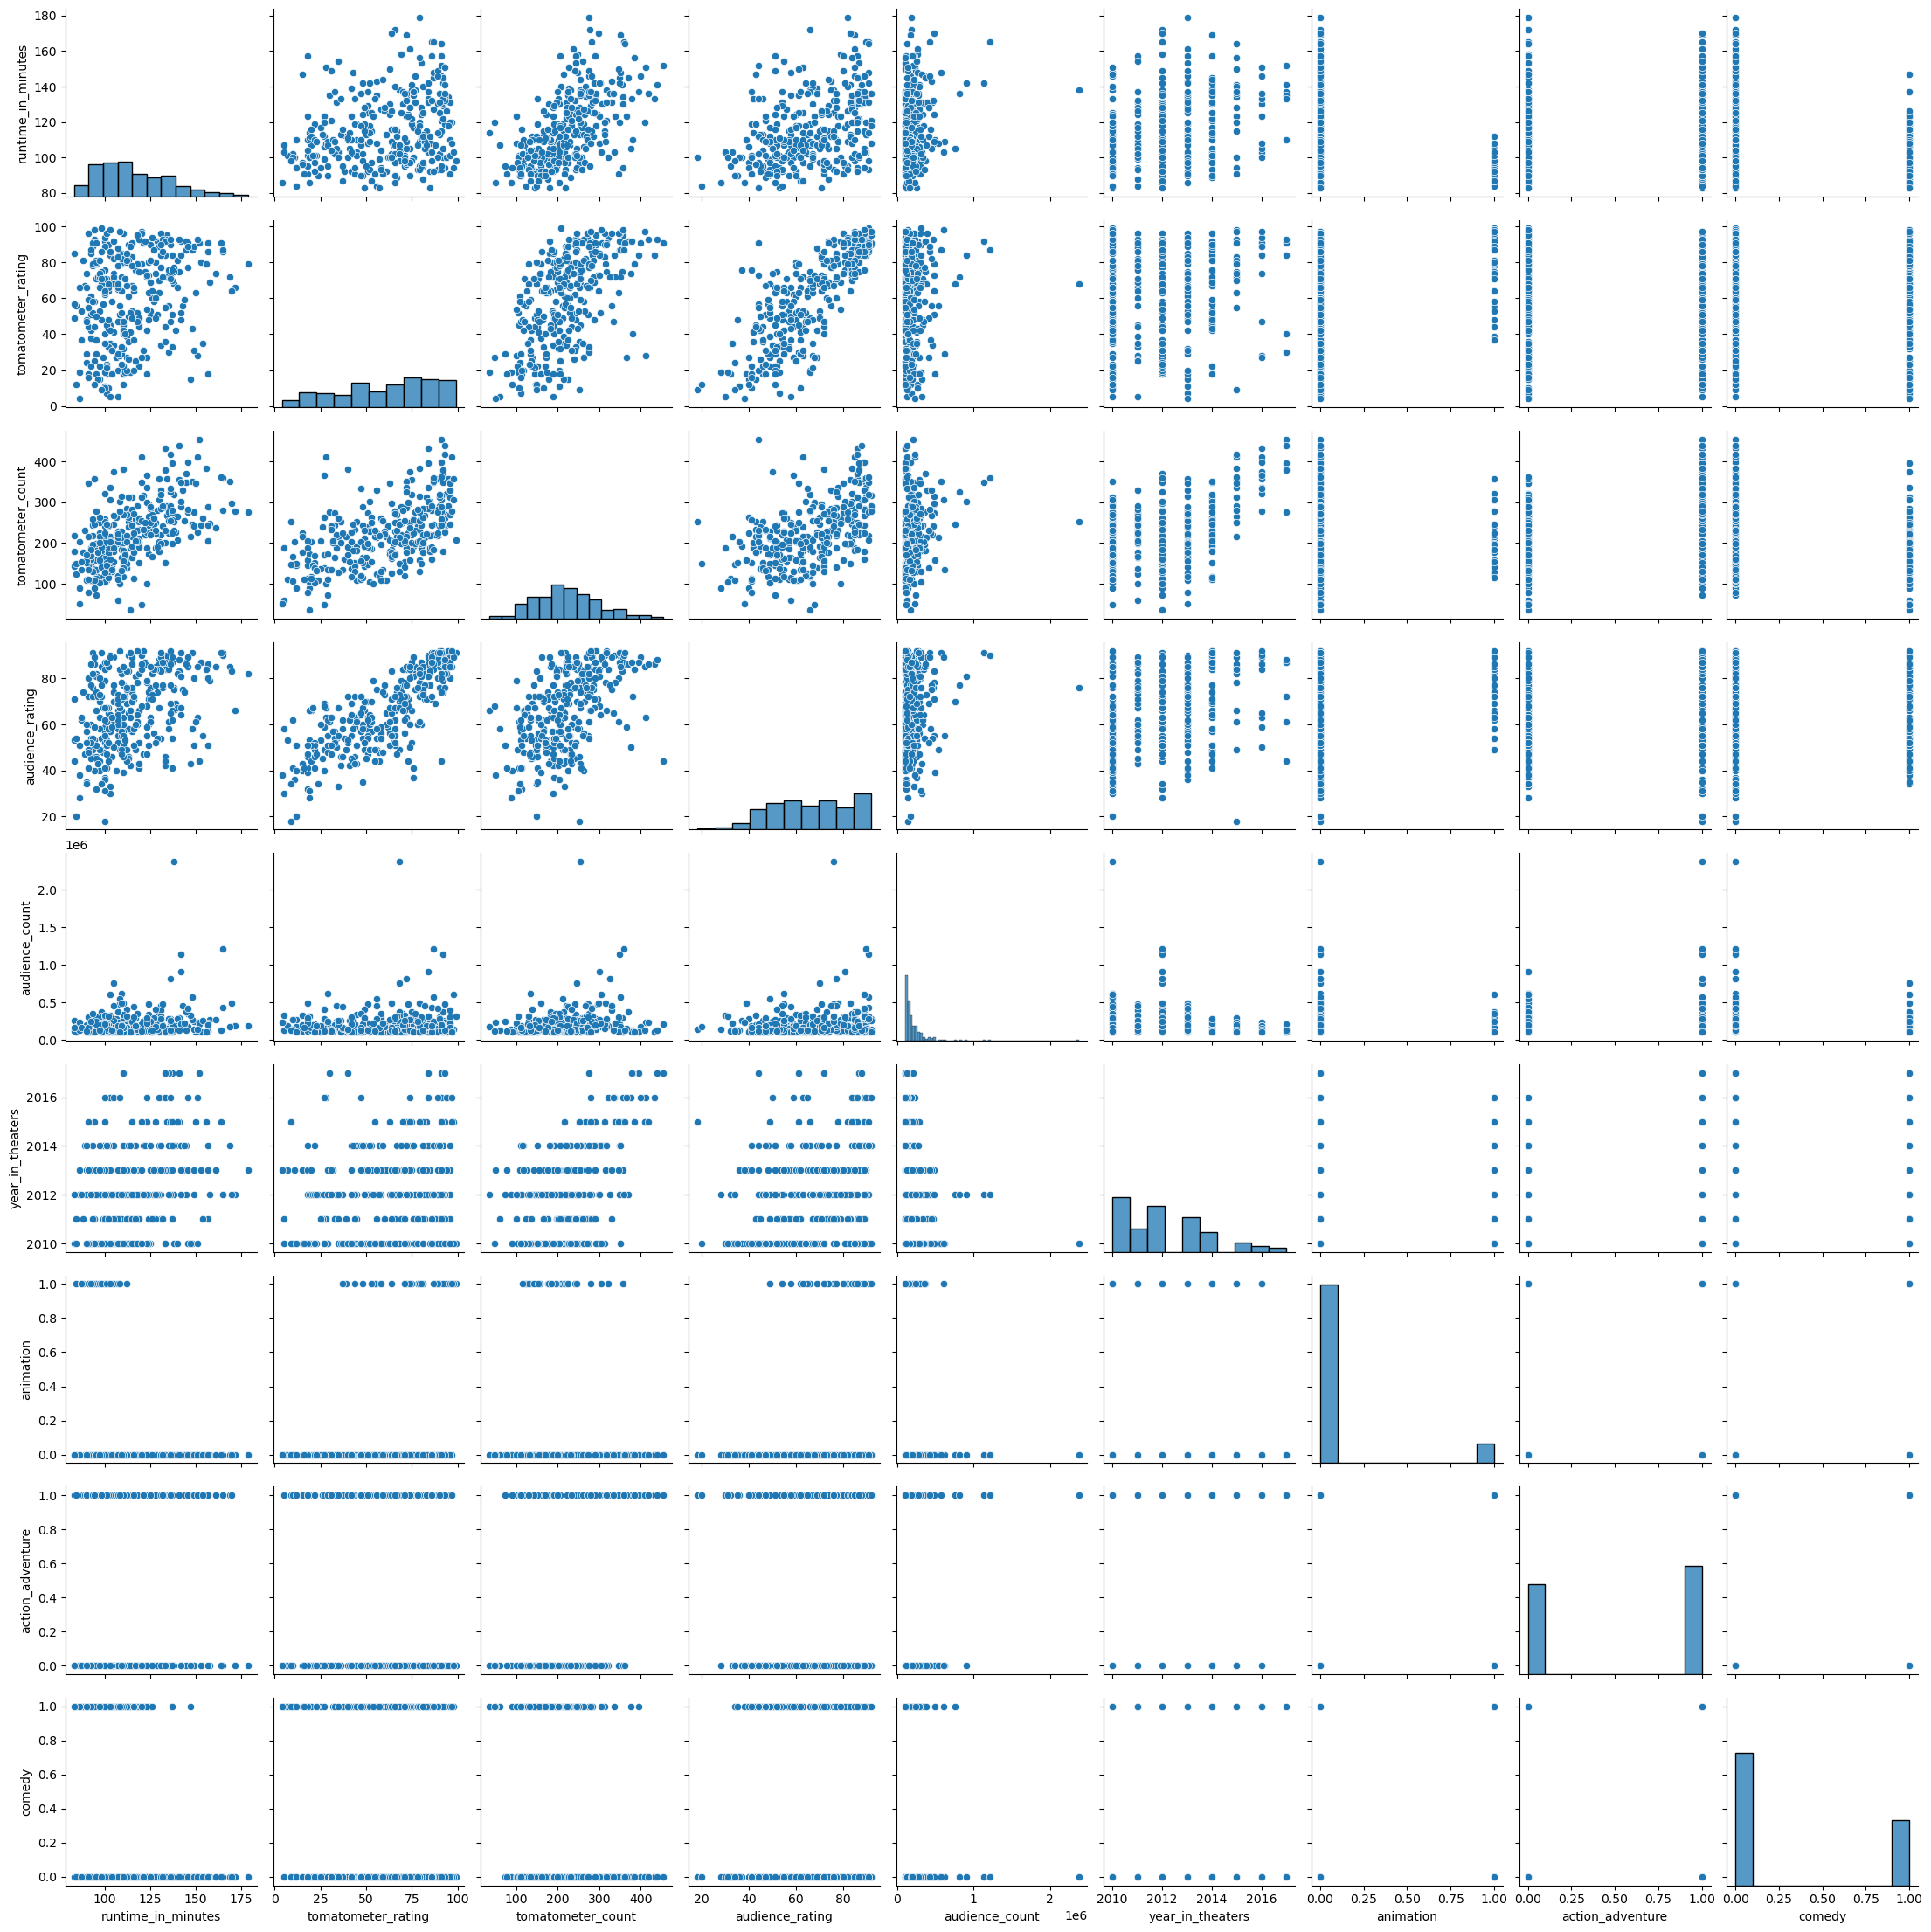

In [142]:
import seaborn as sns

sns.pairplot(movies);

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

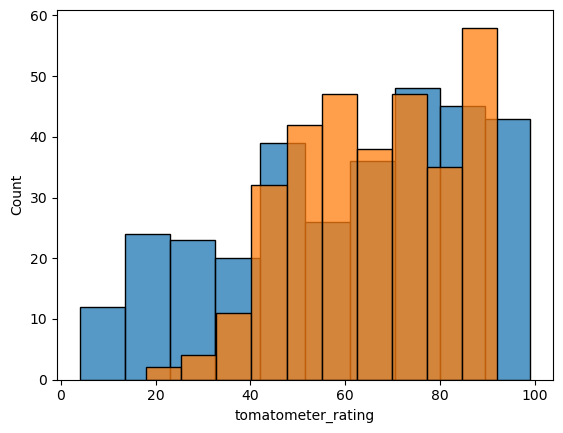

In [153]:
# Closer look at rating histograms

sns.histplot(movies['tomatometer_rating']);
sns.histplot(movies['audience_rating']);

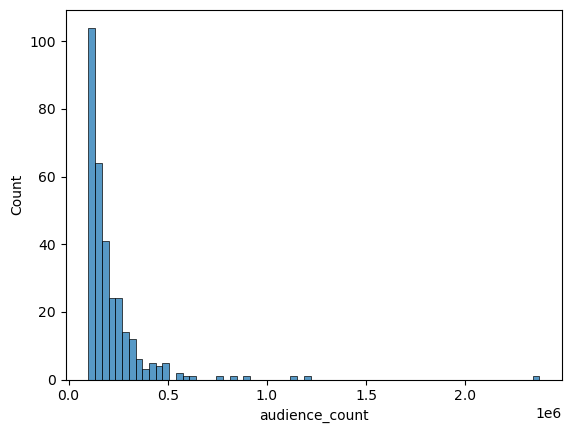

In [175]:
# Identify the audience rating outlier

# Closer look at histogram
sns.histplot(movies['audience_count']);


In [181]:
movies.loc[movies.audience_count > 2000000]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year_in_theaters,animation,action_adventure,comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,2010,0,1,0


## Insights:
- The audience gives higher ratings than the critics since the audience rating plot is skewed to the left.
- There is a positive correlation between the length of movie and the number of reviews.
- Shutter Island had by far the highest audience rating count with 2,373,625 ratings.